# Cancer prediction with gradient boosting machines

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

# Data analysis
cancer data is stored as a 'Bunch Object', reterieving the object attributes

In [13]:
cancer.keys()

dict_keys(['target_names', 'data', 'target', 'DESCR', 'feature_names'])

In [14]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [15]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

# Split the data to test and train datasets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []

# Initlize the Gradient Boositing machines

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

# Measure accuracy of the Classifier

In [18]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [19]:
High accuracy means model is overfitted.To reduce overfitting, we could either apply stronger pre-pruning 
by limiting the maximum depth or lower the learning rate:


SyntaxError: invalid syntax (<ipython-input-19-280aa288ebd3>, line 1)

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# Finding feature Importance

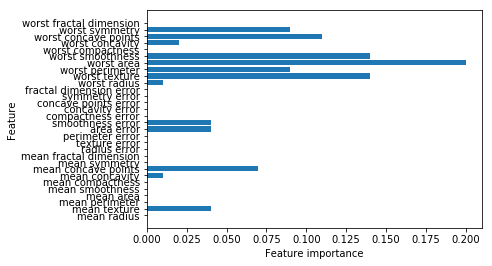

In [20]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    
plt.show()
    
    
plot_feature_importances_cancer(gbrt)